# Lesson 09: 함수관련 기본기능 – 내장함수, lambda, 데코레이터

최규빈  
2023-07-25

# 내장함수

`-` sum,min,max

In [26]:
sum([1,2,3]),min([1,2,3]),max([1,2,3])

In [27]:
min('abc'),max('abc')

`-` eval

In [28]:
eval("(1-1)*6")

In [29]:
eval("'a'+'b'")

In [30]:
eval("[1,2,3]+[4]")

`-` sorted

In [32]:
sorted([1,2,4,3])

In [33]:
a=[1,2,4,3]
a.sort()
a

In [34]:
sorted([1,2,4,3],reverse=True)

`-` all, any

In [35]:
all([True,False,True,False])

In [36]:
any([True,False,True,False])

# lambda

`-` 예제1: 람다표현식(lambda expression)자체가 하나의 오브젝트임

In [37]:
lambda x: (x-2)**2 ### lambda x: (x-2)**2 가 실행되는 순간 메모리상에 함수 오브젝트가 저장됨 

-   “lambda x: (x-2)\*\*2” 는 $lambda(x)=(x-2)^2$의 느낌으로 기억하면
    쉬움

**(사용방법)**

In [38]:
(lambda x: (x-2)**2)(2) # 입력2 -> 출력 (2-2)^2 =0 

In [39]:
(lambda x: (x-2)**2)(5) # 입력5 -> 출력 (5-2)^2 =9

In [40]:
(lambda x: (x-2)**2)(6) # 입력6 -> 출력 (6-2)^2 =16

In [41]:
(lambda x: (x-2)**2)(-2) # 입력-2 -> 출력 (-2-2)^2 =16

**Quiz**

$f(x)=\sqrt{x}$ 를 수행하는 함수를 lambda를 이용하여 구성하라.

`-` 예제2: 람다표현식에 이름을 줄 수 있음.

In [42]:
f = lambda x: (x-2)**2

In [43]:
f(2),f(4),f(6),f(-2)

위의 코드는 아래와 같다.

In [44]:
def f(x):
    return (x-2)**2
f(2),f(4),f(6),f(-2)

`-` 예제3: 조건부 출력

In [45]:
f = lambda x,y: x if x>y else y # x,y가 입력 -> x>y 일때만 x를 리턴하고 그렇지않으면 y를 리턴 = 큰값을 리턴하라는 소리임 

In [46]:
f(1,20)

**Quiz**

임의의 알파벳 문자열을 입력으로 하고, 알파벳이 대문자이면 “대문자
입니다”를 출력하고 소문자이면 “소문자 입니다”를 출력하는 함수를
구성하라.

(힌트) 아래코드 이용

In [47]:
'a'.isupper()

`-` 예제4: 람다표현식들의 리스트

In [48]:
fl = [lambda x: x, lambda x: x**2, lambda x: x**3]

In [49]:
for f in fl: 
    print(f(2))

2
4
8

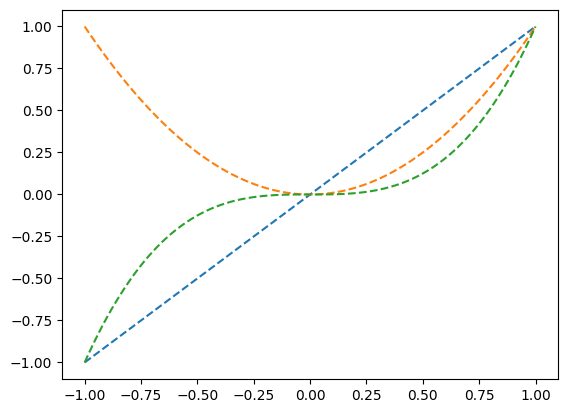

In [50]:
x = np.linspace(-1,1,100)
for f in fl:
    plt.plot(x,f(x),'--') 

`-` 예제5: 람다표현식들의 딕셔너리

In [51]:
fd = {'f1':lambda x: x, 'f2':lambda x: x**2, 'f3':lambda x: x**3}
fd

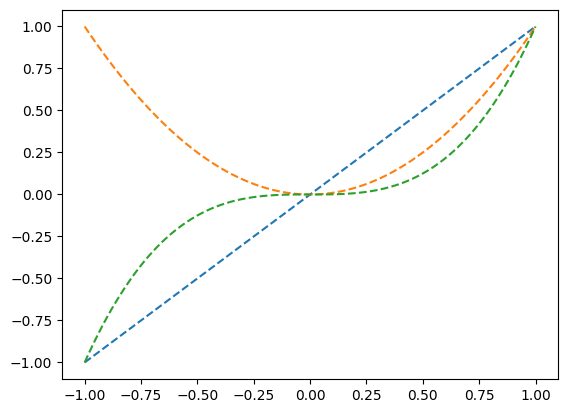

In [52]:
for k in fd:
    plt.plot(x,fd[k](x),'--')

`-` 예제6: 람다표현식을 리턴하는 함수 (함수를 리턴하는 함수)

(예비학습) 함수 $g(x)$가 정의되어 있을때 $\frac{d}{dx}g(x)$의 값을
계산해보기

In [53]:
g = lambda x: x**2 

In [54]:
gg = lambda x : (g(x+0.001)-g(x))/0.001

In [55]:
gg(4)

(목표) 도함수를 구해주는 `derivate` 함수를 정의하자. 이 함수는 임의의
함수 g를 입력으로 받으면, g의 도함수(gg)가 리턴되는 기능을 가진다.

In [56]:
def derivate(g):
    return lambda x : (g(x+0.001)-g(x))/0.001

(사용1)

In [57]:
gg = derivate(g) 

In [58]:
x = np.linspace(0,6.28,1000) 

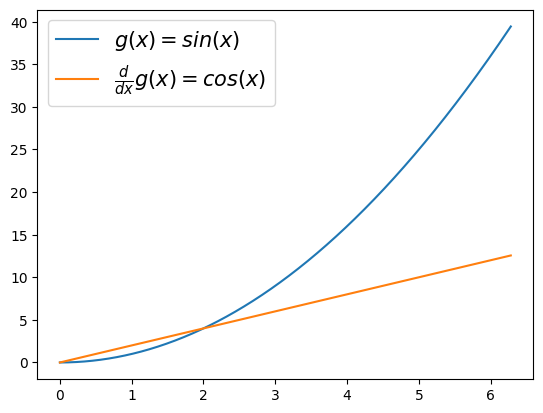

In [59]:
plt.plot(x,g(x),label=r'$g(x)=sin(x)$')
plt.plot(x,gg(x),label=r'$\frac{d}{dx}g(x)=cos(x)$')
plt.legend(fontsize=15)

(사용2)

In [60]:
g0 = lambda x: (1/6)*x**3
g1 = derivate(g0) # (1/2)x^2 
g2 = derivate(g1) # x 

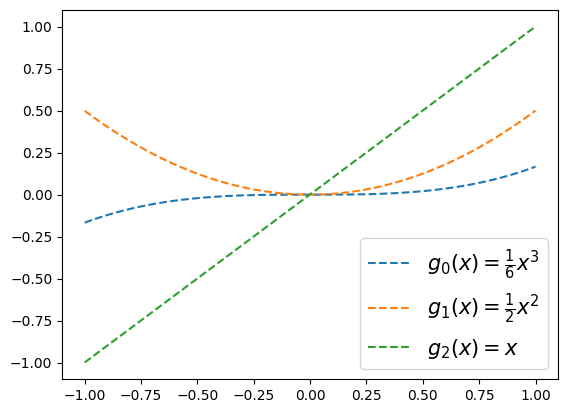

In [61]:
x = np.linspace(-1,1,100)
plt.plot(x,g0(x),'--',label=r'$g_0(x)=\frac{1}{6}x^3$')
plt.plot(x,g1(x),'--',label=r'$g_1(x)=\frac{1}{2}x^2$')
plt.plot(x,g2(x),'--',label=r'$g_2(x)=x$')
plt.legend(fontsize=15)

`-` 예제7: 예제6의 다른표현

In [62]:
derivate = lambda g: lambda x : (g(x+0.001)-g(x))/0.001

(사용1)

In [63]:
g = lambda x: np.sin(x) 

In [64]:
gg = derivate(g) 

In [65]:
x = np.linspace(0,6.28,1000) 

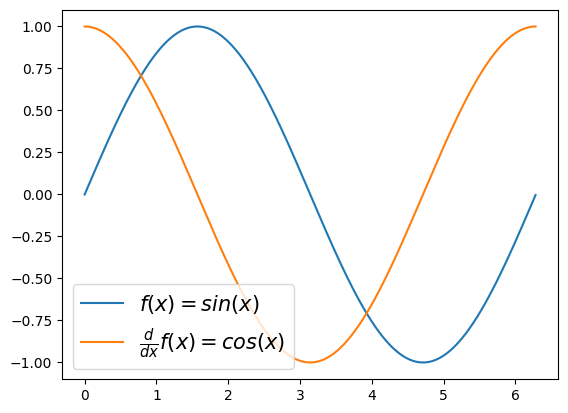

In [66]:
plt.plot(x,g(x),label=r'$f(x)=sin(x)$')
plt.plot(x,gg(x),label=r'$\frac{d}{dx}f(x)=cos(x)$')
plt.legend(fontsize=15)

(사용2)

In [67]:
g0 = lambda x: (1/6)*x**3
g1 = derivate(g0) # (1/2)x^2 
g2 = derivate(g1) # x 

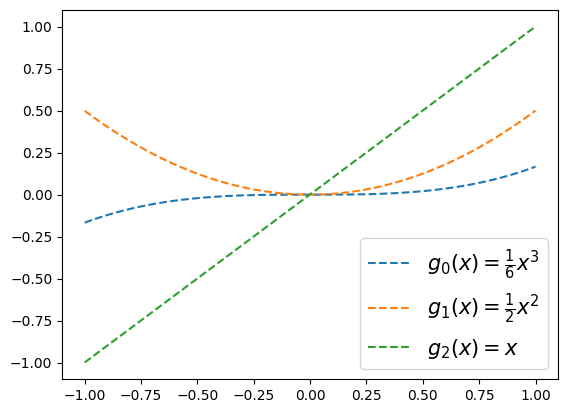

In [68]:
x = np.linspace(-1,1,100)
plt.plot(x,g0(x),'--',label=r'$g_0(x)=\frac{1}{6}x^3$')
plt.plot(x,g1(x),'--',label=r'$g_1(x)=\frac{1}{2}x^2$')
plt.plot(x,g2(x),'--',label=r'$g_2(x)=x$')
plt.legend(fontsize=15)

# 데코레이터

## 미분

`-` 기본예제

In [95]:
def f(x):
    return x**2

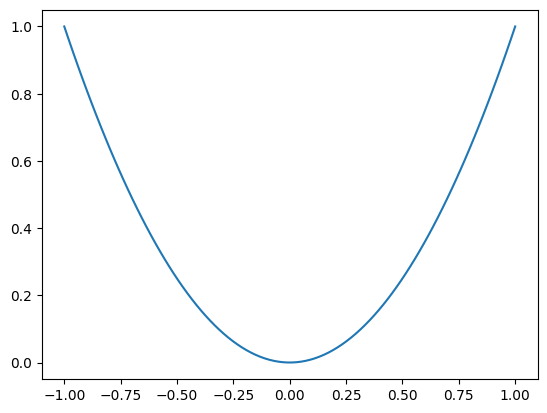

In [96]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x))

`-` 미분의 구현1

In [111]:
def derivate(f):
    h = 0.001
    ff = lambda x: (f(x+h)-f(x))/h
    return ff

In [112]:
def f(x):
    return x**2

In [115]:
ff = derivate(f) 

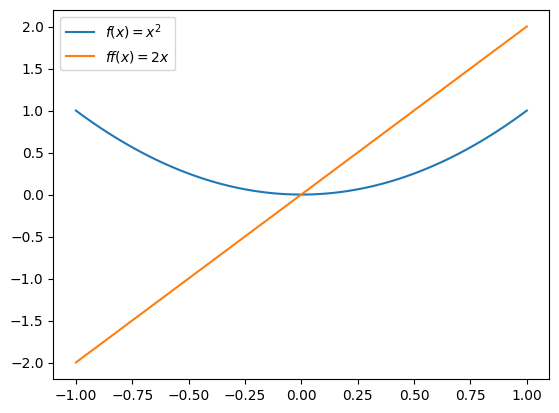

In [116]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x),label=r'$f(x)=x^2$')
plt.plot(x,ff(x),label=r'$ff(x)=2x$')
plt.legend()

`-` 미분의 구현2

In [97]:
def derivate(f):
    h = 0.001
    ff = lambda x: (f(x+h)-f(x))/h
    return ff

In [103]:
def f(x):
    return x**2

In [105]:
@derivate
def ff(x):
    return x**2

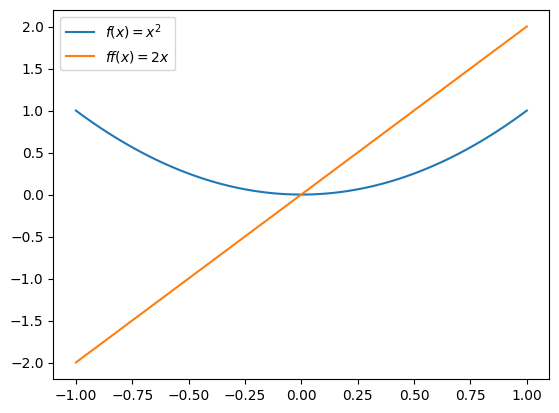

In [110]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x),label=r'$f(x)=x^2$')
plt.plot(x,ff(x),label=r'$ff(x)=2x$')
plt.legend()

## 코드실행 시간 측정

`-` 예제2: 코드의 실행시간 측정

In [122]:
import time

In [129]:
def cal_time(f):
    def ff(x):
        t1= time.time()
        a= f(x)
        t2= time.time()
        print('코드실행시간:{}'.format(t2-t1))
        return a
    return ff 

In [130]:
@cal_time
def f(x):
    return x+1

In [131]:
f(1)

코드실행시간:2.1457672119140625e-06

## 타임아웃

In [141]:
import time
import functools

def timing_decorator(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Execution time of {func.__name__}: {execution_time:.6f} seconds")
        return result
    return wrapper

@timing_decorator
def time_consuming_task():
    # 시간이 오래 걸리는 작업 시뮬레이션
    time.sleep(2)
    print("Task completed.")

time_consuming_task()  # 함수 실행 시간 측정 및 출력

Task completed.
Execution time of time_consuming_task: 2.002197 seconds

## 로그

In [133]:
import functools

def logging_decorator(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        print(f"Calling function: {func.__name__}")
        print(f"Arguments: {args}, {kwargs}")
        result = func(*args, **kwargs)
        print(f"Result: {result}")
        return result
    return wrapper

@logging_decorator
def add(a, b):
    return a + b

add(2, 3)  # 함수 호출과 로그 출력


Calling function: add
Arguments: (2, 3), {}
Result: 5

In [142]:
import time

def loop_progress_decorator(func):
    def wrapper(*args, **kwargs):
        total_iterations = kwargs.get('total_iterations', 10)
        print(f"Starting loop with {total_iterations} iterations.")
        start_time = time.time()

        for i in range(total_iterations):
            result = func(*args, **kwargs)
            elapsed_time = time.time() - start_time
            print(f"Iteration {i + 1}/{total_iterations} completed in {elapsed_time:.2f} seconds.")
        
        return result
    
    return wrapper

# 예시 함수
@loop_progress_decorator
def example_function(total_iterations):
    # 시간이 오래 걸리는 작업 시뮬레이션
    time.sleep(1)
    return "Task completed."

example_function(total_iterations=5)


Starting loop with 5 iterations.
Iteration 1/5 completed in 1.00 seconds.
Iteration 2/5 completed in 2.00 seconds.
Iteration 3/5 completed in 3.00 seconds.
Iteration 4/5 completed in 4.00 seconds.
Iteration 5/5 completed in 5.01 seconds.